In [100]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [101]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
df.shape

(1599, 12)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [104]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [105]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

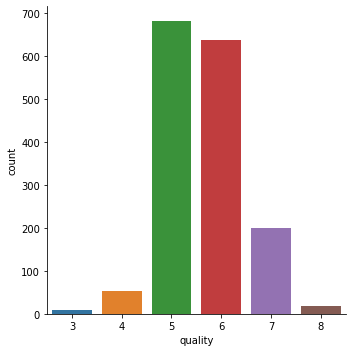

In [106]:
sns.catplot(x="quality",data=df,kind="count")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

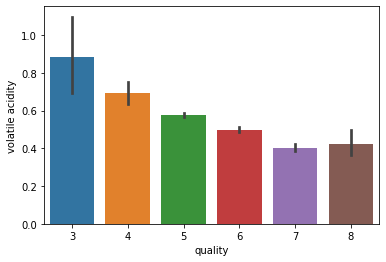

In [107]:
sns.barplot(x="quality",y="volatile acidity",data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

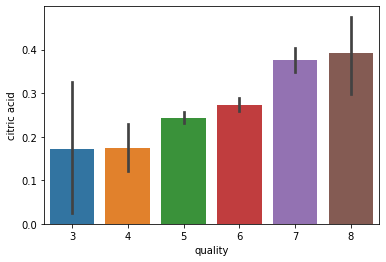

In [108]:
sns.barplot(x="quality",y="citric acid",data=df)

In [109]:
correlation=df.corr()

<AxesSubplot:>

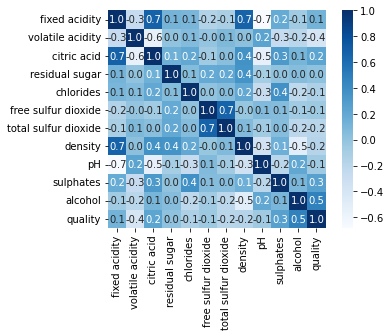

In [114]:
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,square=True,cmap='Blues')

In [110]:
x=df.drop(["quality"],axis="columns")
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [115]:
y=df['quality'].apply(lambda x:1 if x>=7 else 0)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=50)

In [130]:
model=RandomForestClassifier(n_estimators=120)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.90625

In [131]:
predict=model.predict([[7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5]])
if predict[0]==1:
    print("the quality of wine is good.")
else:
    print("the quality of wine is bad.")

the quality of wine is bad.


c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [132]:
predict=model.predict([[8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5]])
if predict[0]==1:
    print("the quality of wine is good.")
else:
    print("the quality of wine is bad.")

the quality of wine is good.


c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
